# Computing Jacobian at Equilibrium

In [1]:
import sympy as sp

# Define variables and functions
t = sp.Symbol('t')
n1 = sp.Function('n1')(t)
n2 = sp.Function('n2')(t)
n3 = sp.Function('n3')(t)
n4 = sp.Function('n4')(t)
n5 = sp.Function('n5')(t)

u = 10e-7
mu = 10e-9
lambda_3 = 0.2
lambda_4 = 0.077
lambda_5 = 0.077
death = 0.05
Ka = 1000
Kr = 600

In [2]:
# Define the system of equations
dn1_dt = -(2*u + mu)*n1
dn2_dt = (2*u)*n1 - (mu + u)*n2
dn3_dt = (u)*n2 - (mu)*n3 + lambda_3*n3*(1-((n3+n4+n5)/Ka)) - (death*n3)
dn4_dt = (mu)*n1 - (2*u)*n4 + lambda_4*n4*(1-((n3+n4+n5)/Kr)) - (death*n4)
dn5_dt = (2*u)*n4 + (mu)*n2 - (u)*n5 + lambda_5*n5*(1-((n3+n4+n5)/Kr)) - (death*n5)

In [3]:
# Solve for equilibrium points
n1_eq, n2_eq, n3_eq, n4_eq, n5_eq = sp.symbols('n1_eq n2_eq n3_eq n4_eq n5_eq')
equilibrium_eqs = [sp.Eq(-(2*u + mu)*n1_eq, 0), 
                   sp.Eq((2*u)*n1_eq - (mu + u)*n2_eq, 0), 
                   sp.Eq((u)*n2_eq - (mu)*n3_eq + lambda_3*n3_eq*(1-((n3_eq+n4_eq+n5_eq)/Ka)) - (death*n3_eq), 0), 
                   sp.Eq((mu)*n1_eq - (2*u)*n4_eq + lambda_4*n4_eq*(1-((n3_eq+n4_eq+n5_eq)/Kr)) - (death*n4_eq), 0), 
                   sp.Eq((2*u)*n4_eq + (mu)*n2_eq - (u)*n5_eq + lambda_5*n5*(1-((n3_eq+n4_eq+n5_eq)/Kr)) - (death*n5_eq), 0)]
equilibria = sp.solve(equilibrium_eqs, (n1_eq, n2_eq, n3_eq, n4_eq, n5_eq))

print("Equilibrium points:", equilibria)

Equilibrium points: [(0.0, 0.0, 0.0, 0.0, 33000.0*n5(t)/(55.0*n5(t) + 21429.0)), (0.0, 0.0, 0.0, 210.365611517854 - 0.999980001199928*n5(t), 0.999980001199928*n5(t) + 0.00841445617159074), (0.0, 0.0, 0.38499217182323*n5(t) + 749.99995, 0.0, -0.38499217182323*n5(t))]


In [4]:
# Compute the Jacobian matrix
variables = [n1, n2, n3, n4, n5]
functions = [dn1_dt, dn2_dt, dn3_dt, dn4_dt, dn5_dt]
jacobian = sp.Matrix(functions).jacobian(variables)

# Linearize around each equilibrium point
linearized_systems = []
eigenvalues_list = []
for eq in equilibria:
    subs_dict = {n1: eq[0], n2: eq[1], n3: eq[2], n4: eq[3], n5: eq[4]}
    jacobian_at_eq = jacobian.subs(subs_dict)
    linearized_systems.append(jacobian_at_eq)

    # Compute eigenvalues for this Jacobian matrix
    eigenvalues = jacobian_at_eq.eigenvals()
    eigenvalues_list.append(eigenvalues)

# supposedly these are the linearized systems. need to convert them into actual equations and plot them on a graph. 
print(linearized_systems)

[Matrix([
[-2.01e-6,        0,                                             0,                                             0,                                            0],
[  2.0e-6, -1.01e-6,                                             0,                                             0,                                            0],
[       0,   1.0e-6, 0.14999999 - 6.6*n5(t)/(55.0*n5(t) + 21429.0),                                             0,                                            0],
[  1.0e-8,        0,                                             0, 0.026998 - 4.235*n5(t)/(55.0*n5(t) + 21429.0),                                            0],
[       0,   1.0e-8,           -4.235*n5(t)/(55.0*n5(t) + 21429.0),   2.0e-6 - 4.235*n5(t)/(55.0*n5(t) + 21429.0), 0.026999 - 8.47*n5(t)/(55.0*n5(t) + 21429.0)]]), Matrix([
[-2.01e-6,        0,                                                 0,                                                0,                                                

### plot the sympy matrix solutions (3 graphs)

# Visualize original ODE

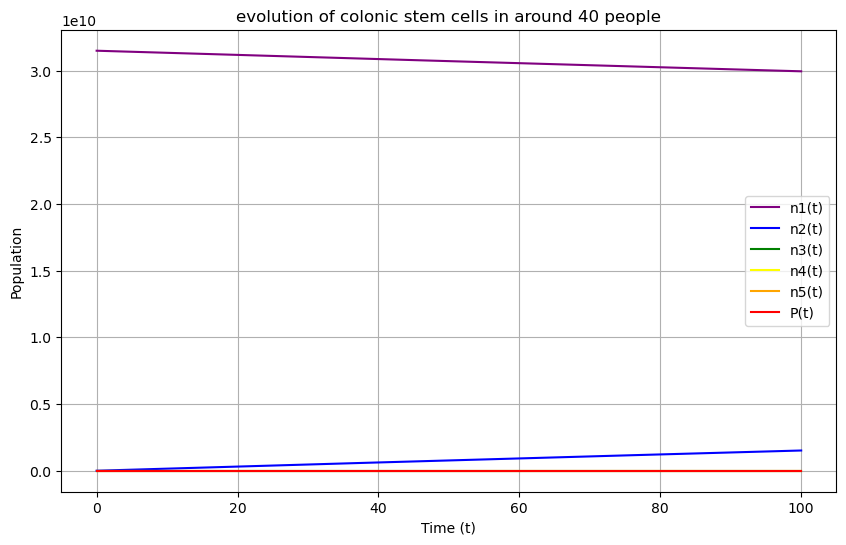

Final values at t = 100:
n1: 29956236876.3430
n2: 1516691493.9659
n3: 43707.8022
n4: 374.7644
n5: 18.9745
P: 0.9995
if P ~ 1, then it suggests 1 person gets cancer (reaches n_6 stage) out of ~40 in a 100 year lifetime


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the system of ODEs
def system(t, y):
    n1, n2, n3, n4, n5, P = y
    
    # Parameters
    r1 = 250
    u = 10e-7*r1
    mu = 10e-9*r1
    lambda_3 = 0.2
    lambda_4 = 0.077
    lambda_5 = 0.077
    death = 0.05
    Ka = 1000
    Kr = 17
    
    # Define the ODEs
    dn1_dt = -(2*u + mu)*n1
    dn2_dt = (2*u)*n1 - (mu + u)*n2
    dn3_dt = (u)*n2 - (mu)*n3 + lambda_3*n3*(1-((n3 + n4 + n5)/Ka)) - (death*n3)
    dn4_dt = (mu)*n1 - (2*u)*n4 + lambda_4*n4*(1-((n3 + n4 + n5)/Kr)) - (death*n4)
    dn5_dt = (2*u)*n4 + (mu)*n2 - (u)*n5 + lambda_5*n5*(1-((n3 + n4 + n5)/Kr)) - (death*n5)
    dP_dt = ((u)*n5 + (mu)*n3)*(1-P)
    
    return [dn1_dt, dn2_dt, dn3_dt, dn4_dt, dn5_dt, dP_dt]

# Initial conditions for n1, n2, n3, n4, n5 at t=0
Ncrypt = 10e7
sc_per_crypt = 7
incidence_per = 45
initial_conditions = [Ncrypt*sc_per_crypt*incidence_per, 0, 0, 0, 0, 0]  # incidence of colorectal cancer is around 1/35 people

# Time span to solve over (from t=0 to t=100)
t_span = (0, 100)
t_eval = np.linspace(0, 100, 500)  # Evaluate at 500 time points

# Solve the system of ODEs
solution = solve_ivp(system, t_span, initial_conditions, t_eval=t_eval)

# Extract the solutions for n1, n2, n3, n4, n5
n1, n2, n3, n4, n5, P = solution.y

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(solution.t, n1, label='n1(t)', color='purple')
plt.plot(solution.t, n2, label='n2(t)', color='blue')
plt.plot(solution.t, n3, label='n3(t)', color='green')
plt.plot(solution.t, n4, label='n4(t)', color='yellow')
plt.plot(solution.t, n5, label='n5(t)', color='orange')
plt.plot(solution.t, P, label='P(t)', color='red')

plt.xlabel('Time (t)')
plt.ylabel('Population')
plt.title('evolution of colonic stem cells in around 40 people')
plt.legend()
plt.grid(True)
plt.show()

final_values = solution.y[:, -1]  # Get the values at the last time point
print("Final values at t = 100:")
print(f"n1: {final_values[0]:.4f}")
print(f"n2: {final_values[1]:.4f}")
print(f"n3: {final_values[2]:.4f}")
print(f"n4: {final_values[3]:.4f}")
print(f"n5: {final_values[4]:.4f}")
print(f"P: {final_values[5]:.4f}")
print("if P ~ 1, then it suggests 1 person gets cancer (reaches n_6 stage) out of ~40 in a 100 year lifetime")

### This incidence is too low, it needs to be higher. also, we wouldnt be detecting the cancer at only 1 cell. 
## we need to find a way to make P grow from other n_6 cells.

# Phase portrait attempt

In [ ]:
# phase portrait attempt

import numpy as np
import matplotlib.pyplot as plt

# Define the vector field
def a(n1, n2, n3, n4, n5):
    return -(2*u + mu)*n1

def b(n1, n2, n3, n4, n5):
    return (2*u)*n1 - (mu + u)*n2

def c(n1, n2, n3, n4, n5):
    return (u)*n2 - (mu)*n3 + lambda_3*n3*(1-((n3+n4+n5)/Ka)) - (death*n3)

def d(n1, n2, n3, n4, n5):
    return (mu)*n1 - (2*u)*n4 + lambda_4*n4*(1-((n3+n4+n5)/Kr)) - (death*n4)

def e(n1, n2, n3, n4, n5):
    return (2*u)*n4 + (mu)*n2 - (u)*n5 + lambda_5*n5*(1-((n3+n4+n5)/Kr)) - (death*n5)
    
# Generate a grid of points
n1, n2, n3, n4, n5 = np.meshgrid(np.linspace(-2, 2, 20), np.linspace(-2, 2, 20))
u = f(x, y)  # dx/dt
v = g(x, y)  # dy/dt

# Plot the phase portrait
plt.quiver(x, y, u, v, color='blue')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Phase Portrait")
plt.grid()
plt.show()
